<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_Doc_Model_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rm -r *.pkl*

rm: cannot remove '*.pkl*': No such file or directory


# **Download Data (Documents)**

In [ ]:
def download_twenty_news():
  !wget https://www.dropbox.com/s/09y9y1h0xk3cxaj/embeddings_twentynews.pkl
  !wget https://www.dropbox.com/s/ewv3vcwgll0r8a7/data_twentynews_labels.pkl
  !wget https://www.dropbox.com/s/chpjn9lzr7rmn2k/fixed_data_twentynews_preprocessed.pkl

In [ ]:
def download_reuters():
  !wget https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
  !wget https://www.dropbox.com/s/bgc1ht0jsyjed6s/embeddings_reuters.pkl
  !wget https://www.dropbox.com/s/9fk30bjzeefvhgl/data_reuters_preprocessed.pkl

In [ ]:
def download_webkb():
  !wget https://www.dropbox.com/s/wz88fk42r0viqvo/data_webkb_preprocessed.pkl
  !wget https://www.dropbox.com/s/8oi5qactwrar1ad/data_webkb_labels.pkl
  !wget https://www.dropbox.com/s/go7r4h39q6l01d5/embeddings_webkb.pkl

In [ ]:
def download_WoS():
  !wget https://www.dropbox.com/s/c6wlr148lhwsbaz/embeddings_wos.pkl
  !wget https://www.dropbox.com/s/j96061ln6oeejkf/data_wos_preprocessed.pkl
  !wget https://www.dropbox.com/s/kiffa4nidkjt7wi/data_wos_labels.pkl

In [ ]:
import os
def download_unzip_crowdgender():
  !wget https://www.dropbox.com/s/trz5uph29b0t0eg/data_crowder.zip
  os.system('unzip data_crowder.zip')

In [ ]:
def download_data(data):
  data = data.lower()
  if data == 'reuters':
    download_reuters()
  elif data == 'twenty_news':
    download_twenty_news()
  elif data == 'crowdgender':
   download_unzip_crowdgender()
  elif data == 'webkb':
    download_webkb()
  elif data == 'wos':
    download_WoS()

#**0. Just Run these..**

In [ ]:
#@title Imports
# from sympy.stats import RaisedCosine, density
import torch
import pandas as pd
from torch import nn
import re
from time import time
import numpy as np
import collections
import gc
from sklearn.feature_extraction.text import CountVectorizer
# from nltk.corpus import stopwords

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#@title Data Loading functions..

def load_crowdgender():
  data_preprocessed = load_obj('data_crowdgender_preprocessed')
  data_preprocessed_labels = load_obj("data_crowdgender_labels")
  embeddings = load_obj('embeddings_crowdgender')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_crowdgender.__name__

def load_reuters():
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_reuters.__name__

def new_50_twenty_news():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_docs')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_docs")
  return data_preprocessed,data_preprocessed_labels,embeddings,new_50_twenty_news.__name__

def new_50_twenty_news_sent():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_sent")
  doc_sent_id = load_obj('50_doc_id_sent')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,new_50_twenty_news_sent.__name__


def load_20News_50():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_docs_preprocessed')
  data_preprocessed_labels = load_obj("50_docs_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_50.__name__

def load_20News_50_sentences():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_data_load_20news_sentences_preprocessed')
  data_preprocessed_labels = load_obj("50_data_load_20news_sentences_labels")
  doc_sent_id = load_obj('50_doc_id_sent_load_20news_sentences')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_50_sentences.__name__

def load_20News():
  embeddings = load_obj('embeddings_twentynews')
  # data_preprocessed = load_obj('data_twentynews_preprocessed')
  data_preprocessed = load_obj('fixed_data_twentynews_preprocessed')
  data_preprocessed_labels = load_obj("data_twentynews_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News.__name__

def load_20News_sentences():
  embeddings = load_obj('embeddings_twentynews_sent')
  data_preprocessed = load_obj('data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("data_twentynews_labels_sent")
  doc_sent_id = load_obj('doc_id_sent_twentynews')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_sentences.__name__

def load_20News_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed.extend(load_obj('data_20News_preprocessed'))
  data_preprocessed_labels.extend(load_obj("data_20news_preprocessed_labels"))
  embeddings.update(load_obj('embeddings_20news'))
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_reuters.__name__

def load_r52():
  data_preprocessed = load_obj('data_r52_preprocessed')
  data_preprocessed_labels = load_obj("data_r52_labels")
  embeddings = load_obj('embeddings_r52')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_r52.__name__

def load_WebKb():
  data_preprocessed = load_obj('data_webkb_preprocessed')
  data_preprocessed_labels = load_obj("data_webkb_labels")
  embeddings = load_obj('embeddings_webkb')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WebKb.__name__

def load_WoS():
  data_preprocessed = load_obj('data_wos_preprocessed')
  data_preprocessed_labels = load_obj("data_wos_labels")
  embeddings = load_obj('embeddings_wos')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WoS.__name__
def load_arXiv():
  data_preprocessed = load_obj('data_arxiv_preprocessed')
  data_preprocessed_labels = load_obj("data_arxiv_labels")
  embeddings = load_obj('embeddings_arxiv')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_arXiv.__name__

In [ ]:
#@title get_keywords
def get_keywords(data):
  keywords_arxiv = ['molecular ','stimulation','liquid','fluid']
  keywords_webkb = ['student','department','india']
  keywords_r52 = ['mutual','fund','market','money']

  keywords_WoS = ['pediatric','protein','clone']
  keywords_20News_Reuters = ['oil','price','opec','bpd','barrel','saudi','production','mln','crude']

  # keywords_reuters = ['company', 'analyst', 'offer', 'pct', 'takeover', 'merger', 'record', 'dividend', 'pay', 'stock']
  # keywords_reuters = ['stock', 'dividend', 'inc']
  keywords_reuters = ['oil','crude','ship']
  # keywords_reuters = ['company']
  # keywords_reuters =['stock']

  keywords_crowdgender = ['housewife','girl','beautiful','blonde']

  keywords_20News = ['sport','game','baseball']
  # keywords_20News = ['looking' ,'add', 'voice' ,'input', 'capability', 'user', 'interface']
  keywords=[]
  data = data.lower()
  if data=='reuters': keywords = keywords_reuters
  elif data=='twenty_news':keywords = keywords_20News
  elif data=='crowdgender':keywords = keywords_crowdgender
  elif data=='webkb':keywords = keywords_webkb
  else:
    print('keyword list not found!!!')
  return keywords

In [ ]:
#@title DESM Score
def cosine_similarity_desm_docs(query_list, train_vec, vocab, embeddings):
  num_docs = len(train_vec)
  num_voc = len(vocab)
  sim_list = torch.zeros(num_docs)
  index = 0
  id_vocab = dict(map(reversed, vocab.items()))
  for d in range(num_docs):
    if(d%5000==0): print(d)
    doc_bar = torch.zeros(300)
    doc_length = 0
    for v in range(num_voc):
      if(train_vec[d][v] > 0):
        doc_bar.add_(train_vec[d][v] * torch.from_numpy(embeddings[id_vocab[v]])/torch.norm(torch.from_numpy(embeddings[id_vocab[v]])))
        doc_length = doc_length + train_vec[d][v]
    doc_bar = doc_bar / doc_length
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

# **1. Data Loading**

In [ ]:
#### Data Downloading ####
d_data= 'reuters' # reuters, twenty_news, webkb, wos, crowdgender
download_data(d_data) ### Run Once

--2021-04-01 05:20:38--  https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8khmuj31il8zgkp/data_reuters_labels.pkl [following]
--2021-04-01 05:20:38--  https://www.dropbox.com/s/raw/8khmuj31il8zgkp/data_reuters_labels.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3be6cd5a35b1983b8929d6b203.dl.dropboxusercontent.com/cd/0/inline/BLw6UnSA7BgEDQ43CHN6fWRdlvtZ2sbTE84UkhymTPx0dEL5bsBCXr7RmBvXbc61C-xM0lk3LOQqJAcaUxYVyfwVMxTFmqqrnpOFGEhi7WHQdABy-NP4q11w8MD8lmcCg4X4abwWpMYbvu9qxqmUpgMl/file# [following]
--2021-04-01 05:20:39--  https://uc3be6cd5a35b1983b8929d6b203.dl.dropboxusercontent.com/cd/0/inline/BLw6UnSA7BgEDQ43CHN6fWRdlvtZ2sbTE84UkhymTPx0dEL5bsBCXr7Rm

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
def doc_remove_extra_stopwords(doc):
  extra_stopwords = ['la','wa','will','fa','ha','pa','co','v','said']
  doc = word_tokenize(doc)
  doc = filter(lambda x:x not in extra_stopwords, doc)
  doc = ' '.join(e for e in doc)
  return doc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# ##### Data loading #####
loaded_data = load_reuters()
##########################

data_preprocessed , data_preprocessed_labels , embeddings, name = loaded_data
for d in range(len(data_preprocessed)):
  data_preprocessed[d] = doc_remove_extra_stopwords(data_preprocessed[d])
print(name,len(data_preprocessed_labels),len(data_preprocessed),len(embeddings))

load_reuters 7674 7674 13651


In [ ]:
preprossed_data = data_preprocessed
train_label = data_preprocessed_labels
vectorizer = CountVectorizer(min_df=10)
train_vec = vectorizer.fit_transform(preprossed_data).toarray()
vocab = vectorizer.vocabulary_
id_vocab = dict(map(reversed, vocab.items()))
nonzeros_indexes = np.where(train_vec.any(1))[0]
train_vec_non_zeros = [train_vec[i] for i in nonzeros_indexes]
preprossed_data_non_zeros = [preprossed_data[i] for i in nonzeros_indexes]
train_label = [data_preprocessed_labels[i] for i in nonzeros_indexes]
train_vec = np.asanyarray(train_vec_non_zeros)
print(train_vec)
print(train_label)
print(vocab)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'trade', 'ship', 'earn', 'earn', 'earn', 'ship', 'earn', 'earn', 'earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'earn', 'earn', 'acq', 'earn', 'earn', 'grain', 'acq', 'earn', 'crude', 'acq', 'earn', 'earn', 'acq', 'acq', 'grain', 'earn', 'earn', 'earn', 'earn', 'earn', 'crude', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'acq', 'earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'acq', 'earn', 'crude', 'crude', 'crude', 'earn', 'acq', 'earn', 'earn', 'earn', 'crude', 'earn', 'earn', 'interest', 'interest', 'crude', 'crude', 'crude', 'crude', 'money-fx', 'crude', 'money-fx', 'acq', 'trade', 'crude', 'earn', 'ship', 'acq', 'earn', 'acq', 'acq', 'acq', 'earn', 'interest',

In [ ]:
keywords = get_keywords(d_data)
all_rscores = cosine_similarity_desm_docs(keywords,train_vec,vocab,embeddings)

0
5000


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor_train_w = torch.from_numpy(train_vec).float()
train_label = np.asarray(train_label)

num_coordinate = 2
bs = 256
en1_units_x = 100
en2_units_x = 100
num_input = train_vec[0].shape[0]
variance_x = 1
learning_rate = 0.001
beta1 = 0.999
beta2 = 0.999
drop_rate = 0.3
num_topic = 10
gc.collect()

100

# Cosine Score

In [ ]:
import torch.nn
cos_sim = nn.CosineSimilarity(dim=-1, eps=1e-8)

In [ ]:
def flatten_list(user_list): return [item for sublist in user_list for item in sublist]
def get_embedding_tensor(word_list,embeddings): return torch.tensor([embeddings[w] for w in word_list])

In [ ]:
torch.pi = torch.acos(torch.zeros(1)).item() * 2

def cosine_angular_sim(keyword_torch,words_tensor):
  return 1 - (torch.acos(cos_sim(keyword_torch,words_tensor))) / torch.pi

def cosine_norm_01(keyword_torch,words_tensor):
  return (cos_sim(keyword_torch,words_tensor) + 1)/2

def cosine_keywords(keywords,words_tensor,word_list):
  all_keywords_score = []
  cosine_score_vocab = {}
  keyword_total_score = torch.zeros(len(vocab))
  for k in keywords:
    keyword_torch = torch.from_numpy(embeddings[k])
    keyword_torch = keyword_torch.unsqueeze(0).expand(len(vocab),words_tensor.shape[1])
    all_keywords_score.append((cosine_norm_01(keyword_torch,words_tensor))
    # keyword_total_score += cos_sim(keyword_torch,words_tensor)
  keyword_max_score,keyword_max_score_idx = torch.max(torch.stack(all_keywords_score),dim=0)
  cosine_score_vocab = dict(zip(word_list,keyword_max_score.numpy()))

  return all_keywords_score,keyword_total_score/len(keywords),keyword_max_score,cosine_score_vocab

In [ ]:
word_list = list(vocab.keys())
words_tensor = get_embedding_tensor(word_list,embeddings)
all_keywords_score,keywords_mean_score,keywords_max_score,cosine_score_vocab = cosine_keywords(keywords,words_tensor,word_list)

sorted_id_word_vocab = sorted(id_vocab.items(), key=lambda x: x[1]) ### alphabetically sorted
sorted_cosine_words_vocab = sorted(cosine_score_vocab.items(), key=lambda x: x[1]) ### cosine sim score sorted

sorted_words_vocab = [s[1] for s in sorted_id_word_vocab]
sorted_cosine_vocab = [s[0] for s in sorted_cosine_words_vocab]

embedding_tensor_sorted_alp = get_embedding_tensor(sorted_words_vocab,embeddings)
embedding_tensor_keywords = get_embedding_tensor(keywords,embeddings)
embedding_tensor_sorted_cos = get_embedding_tensor(sorted_cosine_vocab,embeddings)

# **2. Score**

In [ ]:
top_10_docs=[]
sort,indices = torch.sort(all_rscores,descending=True)
print('Keywords',keywords)
print('Descending :',sort,'\n','indices:',indices)
print('\n\n Top 10 Relevant Documents (DESM):\n\n',"---"*40)

for k in range(10):
   print(k+1,') ',preprossed_data_non_zeros[indices[k].item()])
   print(k+1,')',train_label[indices[k].item()])

with open("1000.txt", "w") as output:
  for k in range(0,1000):
    output.write(str(k+1)+') '+str(preprossed_data_non_zeros[indices[k].item()])+'\n')
    output.write(str(k+1)+') '+str(sort[k].item())+'\n')
    output.write(str(k+1)+') '+str(train_label[indices[k].item()])+'\n')
output.close()

Keywords ['oil', 'crude', 'ship']
Descending : tensor([5.4186e-01, 5.3820e-01, 5.2848e-01,  ..., 3.8469e-02, 1.8520e-02,
        1.0585e-04]) 
 indices: tensor([6652, 1268, 1210,  ..., 6805, 3614, 5426])


 Top 10 Relevant Documents (DESM):

 ------------------------------------------------------------------------------------------------------------------------
1 )  imperial oil raise crude oil posting canadian ct bbl light sweet
1 ) crude
2 )  raise crude oil price one dlr barrel dlrs
2 ) crude
3 )  shell canada raised crude oil posting shell canada wholly owned subsidiary royal dutch shell group rd raised crude oil price canadian ct barrel today increase posted price light sweet crude oil dlrs barrel march one level light sour crude raised dlrs barrel company
3 ) crude
4 )  diamond shamrock dia raise crude oil posting diamond shamrock raised posted price grade crude oil one dlr barrel effective yesterday one dlr increase brings west texas intermediate u benchmark crude dlrs bbl compa

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores=torch.tensor(normalized_all_rscores.flatten())
rounded_normalized_all_rscores = torch.round(normalized_all_rscores*10)/10.0

(array([   4.,  186., 2538., 3158., 1133.,  262.,  128.,  142.,  101.,
          22.]),
 array([1.00000000e-10, 9.90000001e-02, 1.98000000e-01, 2.97000000e-01,
        3.96000000e-01, 4.95000000e-01, 5.94000000e-01, 6.93000000e-01,
        7.92000000e-01, 8.91000000e-01, 9.90000000e-01]),
 <a list of 10 Patch objects>)

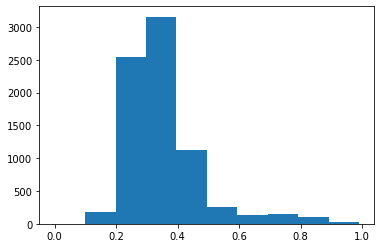

In [ ]:
plt.hist(normalized_all_rscores)

(array([2.000e+00, 3.100e+01, 4.643e+03, 0.000e+00, 2.004e+03, 6.670e+02,
        1.520e+02, 0.000e+00, 1.180e+02, 5.700e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

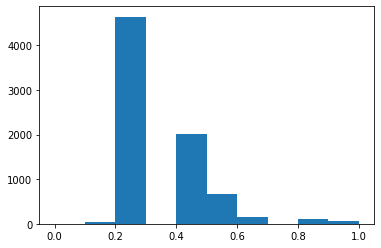

In [ ]:
plt.hist(rounded_normalized_all_rscores)

In [ ]:
gc.collect()

54

# Current Working Model

In [ ]:
#@title torch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Parameter
from torch.autograd import Variable

In [ ]:
#@title Weight Drop
def _weight_drop(module, weights, dropout):
    """
    Helper for `WeightDrop`.
    """
    for name_w in weights:
        w = getattr(module, name_w)
        del module._parameters[name_w]
        module.register_parameter(name_w + '_raw', Parameter(w))

    original_module_forward = module.forward

    def forward(*args, **kwargs):
        for name_w in weights:
            raw_w = getattr(module, name_w + '_raw')
            w = torch.nn.functional.dropout(raw_w, p=dropout, training=module.training)

            setattr(module, name_w, w)

        # return original_module_forward(*args, **kwargs)

    setattr(module, 'forward', forward)


class WeightDrop(torch.nn.Module):
    """
    The weight-dropped module applies recurrent regularization through a DropConnect mask on the
    hidden-to-hidden recurrent weights.

    **Thank you** to Sales Force for their initial implementation of :class:`WeightDrop`. Here is
    their `License
    <https://github.com/salesforce/awd-lstm-lm/blob/master/LICENSE>`__.

    Args:
        module (:class:`torch.nn.Module`): Containing module.
        weights (:class:`list` of :class:`str`): Names of the module weight parameters to apply a
          dropout too.
        dropout (float): The probability a weight will be dropped.

    Example:

        >>> from torchnlp.nn import WeightDrop
        >>> import torch
        >>>
        >>> torch.manual_seed(123)
        <torch._C.Generator object ...
        >>>
        >>> gru = torch.nn.GRUCell(2, 2)
        >>> weights = ['weight_hh']
        >>> weight_drop_gru = WeightDrop(gru, weights, dropout=0.9)
        >>>
        >>> input_ = torch.randn(3, 2)
        >>> hidden_state = torch.randn(3, 2)
        >>> weight_drop_gru(input_, hidden_state)
        tensor(... grad_fn=<AddBackward0>)
    """

    def __init__(self, module, weights, dropout=0.0):
        super(WeightDrop, self).__init__()
        _weight_drop(module, weights, dropout)
        self.forward = module.forward

class WeightDropLinear(torch.nn.Linear):
    """
    Wrapper around :class:`torch.nn.Linear` that adds ``weight_dropout`` named argument.

    Args:
        weight_dropout (float): The probability a weight will be dropped.
    """

    def __init__(self, *args, weight_dropout=0.0, **kwargs):
        super().__init__(*args, **kwargs)

        weights = ['weight']
        # print('name_w in _weight_drop: ', name_w)
        _weight_drop(self, weights, weight_dropout)

In [ ]:
# @title Targeted Dropout Class
import torch
import torch.nn as nn


class TargetedDropout(nn.Module):
    """
    Learning Sparse Networks Using Targeted Dropout
    https://arxiv.org/abs/1905.13678
    """

    def __init__(self,targeted="weight",target_layer=None,
                 dropout_rate=0.5,targeted_portion=0.5):
        super(TargetedDropout, self).__init__()
        self.targeted = targeted
        self.target_layer = target_layer
        self.dropout_rate = dropout_rate
        self.targeted_portion = targeted_portion
        self.weight = target_layer.weight

        if self.targeted == "weight":
            self.targeted_dropout = targeted_weight_dropout
        elif self.targeted == "unit":
            self.targeted_dropout = targeted_unit_dropout

    def forward(self):
        self.weight = self.targeted_dropout(
            weight=self.target_layer.weight,
            dropout_rate=self.dropout_rate,
            targeted_portion=self.targeted_portion,
            is_training=self.training,
        )

        self.target_layer.weight = self.weight
        # output = self.target_layer(x)
        return self.weight

    def extra_repr(self):
        return f"targeted={self.targeted}, dropout_rate={self.dropout_rate}, targeted_portion={self.targeted_portion}"


def targeted_weight_dropout(weight, dropout_rate, targeted_portion, is_training):
    weight_shape = weight.shape
    weight = torch.reshape(weight, [-1, weight_shape[-1]]).float()

    norm = torch.abs(weight)
    idx = int(targeted_portion * torch.tensor(weight.shape[0]).float())
    threshold = torch.sort(norm, dim=0)[0][idx]
    mask = norm < threshold[None, :]

    if not is_training:
        mask = (torch.rand_like(weight) < dropout_rate).to(mask.device.type) & mask

    weight = (1.0 - mask.float()) * weight
    weight = torch.reshape(weight, weight_shape)
    weight = torch.nn.Parameter(weight)

    return weight

def targeted_unit_dropout(weight, dropout_rate, targeted_portion, is_training):
    weight_shape = weight.shape
    weight = torch.reshape(weight, [-1, weight_shape[-1]]).float()

    norm = torch.norm(weight, dim=0)
    idx = int(targeted_portion * int(weight.shape[1]))
    sorted_norms = torch.sort(norm)[0]
    threshold = sorted_norms[idx]
    mask = (norm < threshold)[None, :]
    mask = mask.repeat(weight.shape[0], 1)

    if not is_training:
        mask = torch.where(
            ((1.0 - dropout_rate) < torch.rand_like(weight)).to(mask.device.type)
            & mask,
            torch.ones_like(weight, dtype=torch.float32),
            torch.zeros_like(weight, dtype=torch.float32),
        )

    weight = (1.0 - mask.float()) * weight
    weight = torch.reshape(weight, weight_shape)
    weight = torch.nn.Parameter(weight)

    return weight

In [ ]:
torch.cuda.empty_cache()

mu_div=200.0
smoothen=1e-20
sig=mu_div/2

gaussian_variance=torch.tensor(1)
pi = 3.1415927410125732

def gaussian_dist(x,mu,variance=gaussian_variance):
  x_expand = x.unsqueeze(1).expand(x.shape[0],mu.shape[0],x.shape[1])
  exp_term = torch.exp( -0.5 * torch.sum(((x_expand-mu)/variance)**2,dim=-1))
  var_term = 1.0 / (variance * ((2*pi)**0.5))
  ret = var_term * exp_term
  return ret

def torch_lgamma(a):
  return torch.lgamma(torch.tensor(a))

def torch_gamma(a):
  return torch.exp(torch.lgamma(torch.tensor(a)))

def NewBeta_dist(x,mu,phi_beta,smoothen):
  First = torch_lgamma(phi_beta+smoothen) - (torch_lgamma(phi_beta * mu+smoothen) + torch_lgamma(phi_beta * (1-mu)+smoothen ))
  Second_1 = (mu*phi_beta-1) * torch.log(x+smoothen)
  Second_2 = ( (1-mu)*phi_beta-1 )* torch.log(1-x+smoothen)
  Second = Second_1 + Second_2
  return First + Second

def LogL_NewBeta(x,relevant_scores):
  x_norm = torch.norm(x,dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/mu_div)
  # LogL = torch.log(NewBeta_dist(relevant_scores,mu,sig,smoothen)+smoothen)
  LogL = NewBeta_dist(relevant_scores,mu,sig,smoothen)
  return LogL

#phi
def gaussian(alpha): return -0.5*alpha
def inverse_multi_quadric(alpha): return -0.5*torch.log(torch.ones_like(alpha) + alpha)
def inverse_quadratic(alpha): return -torch.log(torch.ones_like(alpha) + alpha)

class Model(nn.Module):
    def __init__(self, num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs,
                 embedding_words,embedding_keywords, word_emb_size,num_keyword, distance="gaussian"):

        super(Model, self).__init__()
        self.num_input, self.num_coordinate, self.num_topic, self.variance_x, self.bs ,self.word_emb_size, self.num_keyword \
            = num_input, num_coordinate, num_topic, variance_x, bs,word_emb_size,num_keyword

        self.word_emb = embedding_words
        self.embeddings_keys = embedding_keywords

        # encoder
        self.en1_fc     = nn.Linear(num_input, en1_units_x)             # V -> 100 #nxV->(vxh1)->nxh1;
        self.en2_fc     = nn.Linear(en1_units_x, en2_units_x)             # 100  -> 100
        self.en2_drop   = nn.Dropout(drop_rate)
        self.mean_fc    = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.mean_bn    = nn.BatchNorm1d(num_coordinate)              # bn for mean
        self.logvar_fc  = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.logvar_bn  = nn.BatchNorm1d(num_coordinate)              # bn for logvar

        # RBF
        self.in_features = self.num_coordinate
        self.out_features = self.num_topic
        self.centres = nn.Parameter(torch.Tensor(self.out_features, self.in_features))

        self.query_center = nn.Parameter(torch.zeros(2,1))
        self.query_words = nn.Parameter(torch.Tensor(self.num_keyword,self.in_features))

        if distance=="gaussian": self.basis_func = gaussian
        if distance=="inverse_quadratic": self.basis_func = inverse_quadratic
        if distance=="inverse_multi_quadric": self.basis_func = inverse_multi_quadric
        self.init_parameters()

        # decoder layer
        self.decoder    = nn.Linear(self.num_topic, self.num_input)             # 50   -> 1995
        self.decoder_bn = nn.BatchNorm1d(self.num_topic)                      # bn for decoder

        # decoder document
        self.decoder_phi_bn = nn.BatchNorm1d(num_coordinate)                      # bn for decoder
        self.decoder_x_bn = nn.BatchNorm1d(num_coordinate)
        self.decoder_q_bn = nn.BatchNorm1d(num_coordinate)

        # prior mean and variance as constant buffers
        prior_mean   = torch.Tensor(1, num_coordinate).fill_(0)
        prior_var    = torch.Tensor(1, num_coordinate).fill_(variance_x)
        self.prior_mean = nn.Parameter(prior_mean, requires_grad=False)
        self.prior_var  = nn.Parameter(prior_var, requires_grad=False)
        self.prior_logvar = nn.Parameter(prior_var.log(), requires_grad=False)

        # self.topic_embedding = nn.Parameter(300,self.num_topic) # 300 x K
        self.topic_embedding = nn.Linear(self.word_emb_size,self.num_topic,bias=False) # 300 x K

        self.topic1_fc     = nn.Linear(self.in_features, en1_units_x)
        self.topic2_fc     = nn.Linear(en1_units_x, en2_units_x)
        self.topic2_drop   = nn.Dropout(drop_rate)
        self.topic_mapping = nn.Linear(en2_units_x, self.word_emb_size)
        self.topic_embeddings = 0

        # num_embeddings, embedding_size = embeddings_w.size()
        # word_emb = nn.Embedding(num_embeddings, embedding_size)

        ## topic embedding (Parameter), Regularization, topic embedding space paper
        ## beta --> softmax (word_emb^T (V x 300) .(300 x K)  topic_emb) --> (V x K).transpose --> K x V
        ## OR
        ## beta --> softmax (word_emb (V x 300) .(300 x K)  topic_emb) --> (V x K).transpose --> K x V

    def init_parameters(self):
        nn.init.normal_(self.centres, 0, 0.01)
        nn.init.normal_(self.query_words, 0, 0.01)

    def encode(self, input_):
        N, *_ = input_.size()
        en1 = F.softplus(self.en1_fc(input_))                           # en1_fc   output
        en2 = F.softplus(self.en2_fc(en1))                              # encoder2 output
        en2 = self.en2_drop(en2)
        posterior_mean   = self.mean_bn  (self.mean_fc  (en2))          # posterior mean
        posterior_logvar = self.logvar_bn(self.logvar_fc(en2))          # posterior log variance
        posterior_var    = posterior_logvar.exp()

        return en2, posterior_mean, posterior_logvar, posterior_var

    def take_sample(self, input_, posterior_mean, posterior_var, prior_var):
        eps = input_.data.new().resize_as_(posterior_mean.data).normal_(std=1) # noise
        z = posterior_mean + posterior_var.sqrt() * eps           # reparameterization
        return z

    def get_beta(self):

        # try: beta_param = self.topic_embedding(self.word_emb.weight) # torch.mm(self.word_emb, self.topic_embedding)
        # except: beta_param = self.topic_embedding(self.word_emb)
        beta_param = self.topic_embedding(self.word_emb)
        # beta_param = torch.mm(self.word_emb,self.topic_embedding) # V x 300 * 300 x K
        beta = F.softmax(beta_param,dim=0).transpose(1,0) ## softmax over vocab dimension # KxV

        # t1 = F.relu(self.topic1_fc(self.decoder_phi_bn(self.centres)))                          # en1_fc   output
        # t2 = F.relu(self.topic2_fc(t1))
        # # t2 = self.topic2_drop(t2)
        # self.topic_embeddings = self.topic_mapping(t2) # 300 x K

        # beta = F.softmax(torch.mm(self.word_emb,self.topic_embeddings.T),dim=0).transpose(1,0) ## softmax over vocab dimension
        return beta

    def decode(self, z):
        N, *_ = z.size()
        zx = self.decoder_x_bn(z).view(N, 1, self.num_coordinate) # Nx1xX
        size = (N, self.out_features, self.in_features) # N,K,2
        x = zx.expand(size)
        c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)
        d = (x-c).pow(2).sum(-1)
        distances = self.basis_func(d)
        zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True)) # theta

        # recon_v = torch.mm(zx_phi, F.softmax(self.decoder_bn(self.decoder.weight).transpose(1,0), dim=-1)) # we compute that from Softmax (ETM)

        # sizeq = (N, self.num_keyword, self.in_features) # N,Q,2
        # xq = zx.expand(sizeq) # N x Q x 2
        # cq = self.decoder_q_bn(self.query_words).unsqueeze(0).expand(sizeq)
        # dq = (xq-cq).pow(2).sum(-1)
        # distancesq = self.basis_func(dq) #NxK
        # zx_q = torch.exp(distancesq - torch.logsumexp(distancesq, dim=-1, keepdim=True))

        beta = self.get_beta()
        recon_v = torch.mm(zx_phi, beta)

        return recon_v, zx, zx_phi, d, c

    def forward(self, input_, relevant_scores,compute_loss=False):
        en2, posterior_mean, posterior_logvar, posterior_var = self.encode(input_)
        z = self.take_sample(input_, posterior_mean, posterior_var, self.variance_x)
        recon_v, zx, zx_phi,d,c= self.decode(z)

        if compute_loss:
            return recon_v, self.loss(input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx)
        else:
            return z, recon_v, zx, zx_phi

    def KLD(self, posterior_mean,posterior_logvar,posterior_var):
        N = posterior_mean.shape[0]
        prior_mean   = self.prior_mean.expand_as(posterior_mean)
        prior_var    = self.prior_var.expand_as(posterior_mean)
        prior_logvar = self.prior_logvar.expand_as(posterior_mean)

        var_division    = posterior_var  / prior_var
        diff            = posterior_mean - prior_mean
        diff_term       = diff * diff / prior_var
        logvar_division = prior_logvar - posterior_logvar

        xKLD = 0.5 * ((var_division + diff_term + logvar_division).sum(-1) - self.num_coordinate)
        return xKLD

    def loss(self, input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx, avg=True):
        N = posterior_mean.shape[0]
        NL = - (input_ * (recon_v+1e-10).log()).sum(-1)

        # wq_density = gaussian_dist(self.word_emb,self.embeddings_keys) #VxQ
        # recon_q = - (input_ * (torch.mm(zx_q,wq_density.transpose(1,0))+1e-30).log()).sum(-1)

        ## design Regularization (in embedding space) function so as it stays close to the keywords
        ## (distance to keywords in embedding space) (try *min* ,max, mean)
        ## Stay close to keyword --> keyword embedding

        ## Regularization {embedding space not vis space}
        ## (lambda1(relevant), lambda2(irrelevant)) || (Set K1 and K2) [Cosine dist or etc... Max(k1) & Min(k2)]
        ## Focus topics to be around query so that it displays words relevant to the query
        ## >> Long Paper <<

        ### "Add Term Selector" ####

        NL= NL.sum()
        KLD = self.KLD(posterior_mean,posterior_logvar,posterior_var).sum()
        NegativeLogL_RScore = - LogL_NewBeta(zx,relevant_scores).sum()

        # recon_q_sum = recon_q.sum()

        # te = self.topic_embeddings.view(self.num_topic, 1, self.word_emb_size)
        # size = (self.num_topic, self.num_keyword, self.word_emb_size)  # K,Q,300
        # x = te.expand(size)
        # c = self.embeddings_keys.unsqueeze(0).expand(size)

        # d = (x-c).pow(2).sum(-1)
        # d = cos_sim(x,c)

        # regularization1 = 1e5 * torch.mean(d,axis=1)[1:].sum() #relevant
        # regularization2 = 1e1 * torch.mean(d,axis=1).sum() #non-relevant

        # NegativeLogL_RScore = torch.tensor(0.0)
        # recon_q_sum = torch.tensor(0.0)

        loss = NL + KLD + NegativeLogL_RScore # regularization1 + regularization2 + NegativeLogL_RScore + recon_q_sum


        ## Idea - Use Regularization only (Without Score) to model relevance of docs (incorporate that in model how?)

        return loss/N, NL,KLD, NegativeLogL_RScore

NameError: ignored

In [ ]:
num_keyword = embedding_tensor_keywords.shape[0]
emb_size = embedding_tensor_keywords.shape[1]
cos_sim = nn.CosineSimilarity(dim=-1, eps=1e-8)

embedding_tensor_words = embedding_tensor_sorted_alp ## alphabetically sorted Vocab
embedding_tensor_words = embedding_tensor_words.to(device)
embedding_tensor_keywords = embedding_tensor_keywords.to(device)

model = Model(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs,
              embedding_tensor_words,embedding_tensor_keywords,emb_size,num_keyword, "inverse_quadratic")

model.to(device)

# optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2), weight_decay=0.01) # L2 for loss
optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2))

epochs = 1000

kld_arr,recon_arr,neg_log_rscore_arr = [],[],[]
all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)

for epoch in range(epochs):

    loss_u_epoch = 0.0 ## NL loss
    loss_KLD = 0.0  ## KL loss
    loss_epoch = 0.0 ## Loss per batch #
    neg_log_rscore_ep = 0.0 ## Neg Loss (Score)

    model.train()

    for batch_ndx in all_indices:

        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        recon_v, (loss, loss_u, xkl_loss, neg_log_rscore) = model(input_w, relevant_scores, compute_loss=True)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()             # backpror.step()
        loss_epoch += loss.item()
        loss_u_epoch += loss_u.item()
        loss_KLD += xkl_loss.item()
        neg_log_rscore_ep += neg_log_rscore.item()

    kld_arr.append(loss_KLD)
    recon_arr.append(loss_u_epoch)
    neg_log_rscore_arr.append(neg_log_rscore_ep)

    if epoch % 10 == 0:
        print('Epoch -> {} , loss -> {}'.format(epoch,loss_epoch))
        print('recon_loss==> {} || KLD==> {} || neg_loss==> {}'.format(loss_u_epoch, loss_KLD,neg_log_rscore_ep))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch -> 0 , loss -> 15918.591403145132
recon_loss==> 3227593.1171875 || KLD==> 12058.318420410156 || neg_loss==> 832483.2664636701
Epoch -> 10 , loss -> 14697.332751496187
recon_loss==> 2931264.953125 || KLD==> 9809.630828857422 || neg_loss==> 818590.3105852166
Epoch -> 20 , loss -> 14479.828637314764
recon_loss==> 2885915.875 || KLD==> 13603.907745361328 || neg_loss==> 804501.2381290654
Epoch -> 30 , loss -> 14336.49835232052
recon_loss==> 2858693.3984375 || KLD==> 17670.22967529297 || neg_loss==> 790995.9439654575
Epoch -> 40 , loss -> 14219.496804073604
recon_loss==> 2840584.0390625 || KLD==> 19645.00994873047 || neg_loss==> 777198.7536827602
Epoch -> 50 , loss -> 14116.178845323382
recon_loss==> 2827857.125 || KLD==> 19620.525024414062 || neg_loss==> 763521.4209009575
Epoch -> 60 , loss -> 14012.61854554682
recon_loss==> 2817547.5 || KLD==> 18822.71319580078 || neg_loss==> 748140.5399488985
Epoch -> 70 , loss -> 13906.28605340951
recon_loss==> 2808146.671875 || KLD==> 18508.615539

# **Functions (Plot_loss, get_topwords, get_Z, get_Contour, print_Topics)** - *Run Once*

In [ ]:
#@title get_all_tensor_size
def getall_tensor_size():
  for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size(),get_mem_size(obj))
    except:
        pass

In [ ]:
import plotly.graph_objects as go
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

In [ ]:
def get_topwords(beta, id_vocab):
    topic_indx = 0
    topwords_topic = []
    for i in range(len(beta)):
        topwords_topic.append( str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-100 - 1:-1]]))
        topic_indx+=1
    return topwords_topic

In [ ]:
def get_Z(X,Y):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])

      norms[i][j] = torch.norm(v)
      Z[i][j]=torch.exp(-0.5 * (torch.pow(norms[i][j],2))/mu_div)

      # norms[i][j] = (v-query_center.T).pow(2).sum(-1)
      # Z[i][j]=torch.exp(-0.5 * norms[i][j]/mu_div)
  return Z

In [ ]:
def get_Contour(ax,x_list,lim):
  xlist = np.linspace(-lim, lim, 200)
  ylist = np.linspace(-lim, lim, 200)
  X, Y = np.meshgrid(xlist, ylist)
  Z = get_Z(X,Y)
  levels = np.arange(0,1,0.1)
  cp = ax.contour(X, Y, Z, levels=levels)
  ax.clabel(cp, inline=1, fontsize=10)

In [ ]:
import seaborn as sb

def plot_fig(zx, labels_list, zphi, query_center,query_words,lim,contour='No'):
    labels = []
    for i in range(len(labels_list)):
        labels.append('C'+str(labels_list[i]))
    fig, ax = plt.subplots( figsize=(20, 20))
    if contour=='yes':
       get_Contour(ax,zx,lim)

    sb.scatterplot(ax=ax,x=zx[:,0],y=zx[:,1],hue=labels_list,alpha=0.8,palette='deep')
    ax.set(ylim=(-lim,lim))
    ax.set(xlim=(-lim,lim))

    ax.text(query_center[0],query_center[1], 'X' ,c='red')
    # ax.text(0,0, 'X' ,c='black')
    for i in range(len(query_words)):
      if (i==len(query_words)-1):
        ax.text(query_words[i][0],query_words[i][1], 'X'+keywords[i] ,c='black')
      else:
        ax.text(query_words[i][0],query_words[i][1], 'X'+keywords[i] ,c='black')

    ax.scatter(zphi[:, 0], zphi[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=30)

    for indx, topic in enumerate(zphi):
        ax.text(zphi[indx, 0], zphi[indx, 1], 'topic'+str(indx))

In [ ]:
def print_Topics():
  print("---"*10)
  topword_topics = get_topwords(beta, id_vocab)
  topword_topics_list=[]
  for topwords in topword_topics:
      topword_topics_list.append(topwords.split())
      print(topwords)
  print("---"*10)

# **Plots,Topics,Visualizations**

In [ ]:
plot_loss(neg_log_rscore_arr,"neg")

In [ ]:
plot_loss(recon_arr,"Recon")

In [ ]:
model.eval()
x_list = []
labels_list = []
doc_ids = []
zx_phi_list=[]

with torch.no_grad():
    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]

        relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)

        labels_list.extend(labels)
        z, recon_v, zx, zx_phi = model(input_w, relevant_scores,compute_loss=False)
        zx = zx.view(-1, num_coordinate).data.detach().cpu().numpy()
        zx_phi = zx_phi.view(-1, num_topic).data.detach().cpu().numpy()
        zx_phi_list.extend(zx_phi)
        x_list.extend(zx)
        doc_ids.extend(batch_ndx)

    x_list = np.array(x_list)

    beta = model.decoder.weight.data.cpu().numpy().T#
    # beta = model.get_beta().data.cpu().numpy()
    zphi = model.decoder_phi_bn(model.centres).data.cpu().numpy()
    query_center = model.query_center.data.cpu().numpy()
    query_words = model.decoder_q_bn(model.query_words).data.cpu().numpy()

In [ ]:
print_Topics()

------------------------------
0: nigel aerospace warns expired liberty restated redemption representing pumping lyon aggressively reflecting bureau negotiating shipowner clear worldwide conditioned written boost rio difficulty province foreign decade outline movement foundation look strengthening zero contribute nd defensive semiconductor prepared steel shareholder georgia netherlands reaffirmed secondary notice near person singapore mln computer position operates diamond montgomery nature started worth loading court protect geneva supply goodwill brace goldman conflict reflected crucial thereafter comprised add opposing reiterated penalty optic group welcomed pay subsidiary turn policy broken adverse highest weak widespread refined john adding outflow harm adviser built vote diplomatic cleared elect spa side objective someone prime
1: jersey commissioner future warns antitrust integrated emerged francaise brewer clearance swedish province french returned counter seller navy pak divid

In [ ]:
get_keywords(d_data)

['oil', 'crude', 'ship']

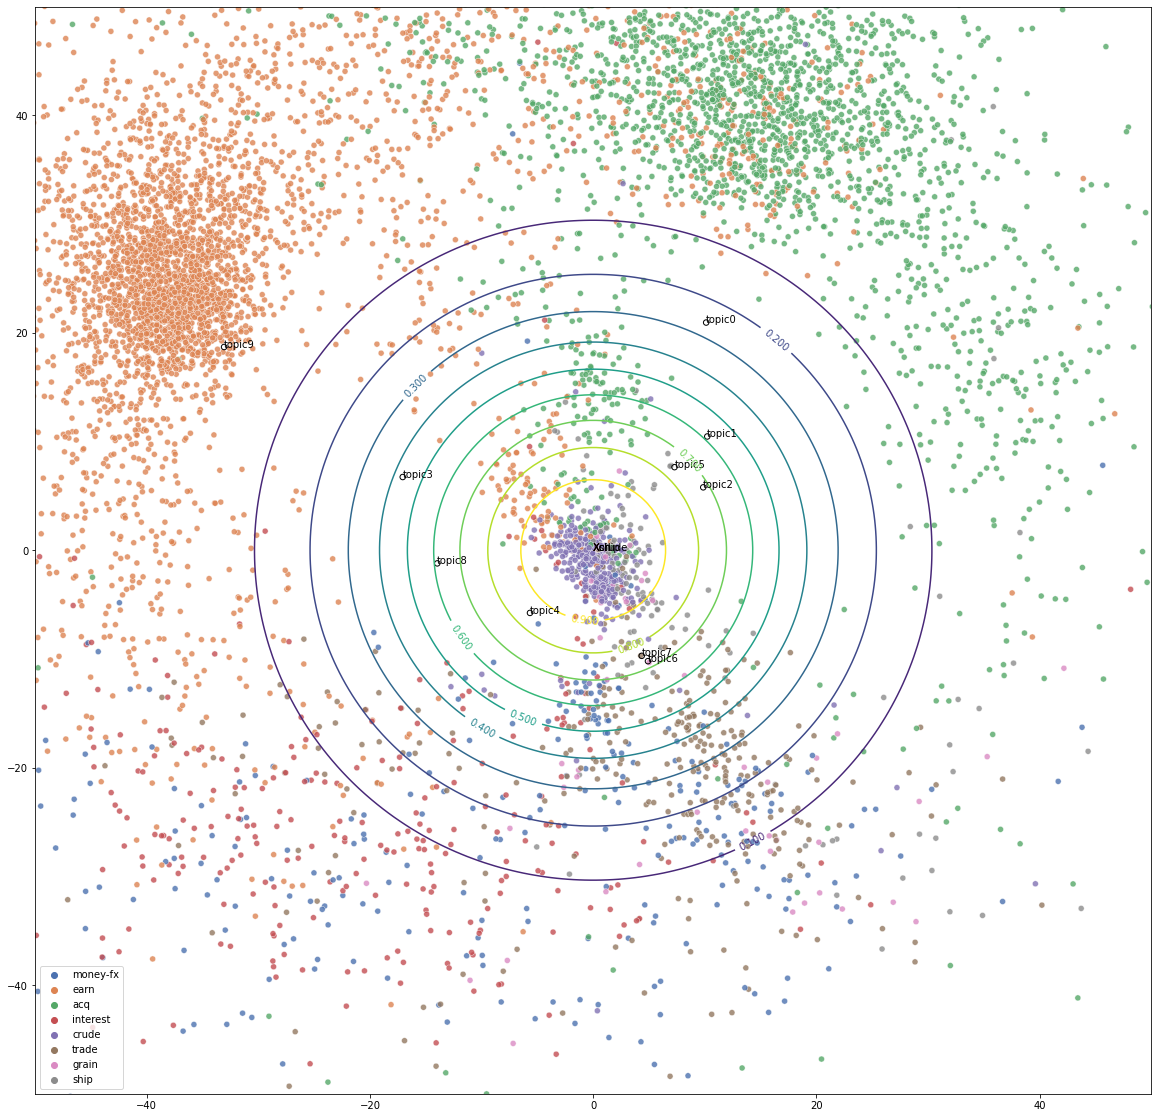

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center,query_words,lim =50,contour='yes')

# ____ STOP____

In [ ]:
STOP!!!!

SyntaxError: ignored

In [ ]:
STOP!!!!

In [ ]:
STOP!!!!

# Save/Download Results

In [ ]:
doc_ids_model = [i.item() for i in doc_ids]

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center, lim = (-70,70) ,contour='yes')

In [ ]:
save_obj(get_topwords(beta, id_vocab),"top100_DocModel_"+d_data)

In [ ]:
save_obj(x_list,"x_list")
save_obj(indices,"doc_id_desm")
save_obj(doc_ids_model,"doc_ids_model")
save_obj(labels_list,"labels_list")
save_obj(all_rscores,"all_rscores")
save_obj(keywords,'keywords_'+d_data)

In [ ]:
from google.colab import files
files.download("doc_ids_model.pkl")
files.download("doc_id_desm.pkl")
files.download("x_list.pkl")
files.download("labels_list.pkl")
files.download("all_rscores.pkl")
files.download("keywords_"+d_data+".pkl")

In [ ]:
rm -r *.pkl*